## Section 5.1: Textual Data {-}

### Section 5.1.1: The Disputed Authorship of ‘The Federalist Papers’ {-}

#### Importing textual data into a DataFrame {-}

In [35]:
import pandas as pd
import numpy as np
import glob

# Get a list of all txt files in the federalist directory
file_paths = glob.glob('federalist/*.txt')

# Create an empty list
file_contents = []

# Read txt files into the empty list
for file in file_paths:
    # with: open and close file automatically
    # open(file, 'r'): open file in read mode
    # assign opened file to f
    with open(file, 'r') as f:
        file_contents.append(f.read())

# Take a look at the first 100 characters of essay number 10
file_contents[9][:100]

'AMONG the numerous advantages promised by a well-constructed Union, none \n        deserves to be mor'

In [36]:
# Create a data frame with essay number, a placeholder for author, and the text
federalist = pd.DataFrame({'fed_num': np.arange(1,86), 'author': None,
                           'text': file_contents})

# store authorship information
hamilton = ([1] + list(range(6,10)) + list(range(11, 14)) + 
            list(range(15, 18)) + list(range(21, 37)) + list(range(59, 62)) + 
            list(range(65, 86)))

madison = [10] + [14] + list(range(37, 49)) + [58]

jay = list(range(2,6)) + [64]

joint = [18, 19, 20] # Madison and Hamilton

# store conditions for authorship
conditions = [
      federalist['fed_num'].isin(hamilton),
      federalist['fed_num'].isin(madison),
      federalist['fed_num'].isin(jay),
      federalist['fed_num'].isin(joint)
]

choices  = ['Hamilton', 'Madison', 'Jay', 'Joint']

# populate the author column; assign 'Disputed' to unassigned essays
federalist['author'] = np.select(conditions, choices, 'Disputed')

federalist

,fed_num,author,text
0,1,Hamilton,AFTER an unequivocal experience of the ineffic...
1,2,Jay,WHEN the people of America reflect that they a...
2,3,Jay,IT IS not a new observation that the people of...
3,4,Jay,MY LAST paper assigned several reasons why the...
4,5,Jay,"QUEEN ANNE, in her letter of the 1st July, 170..."
...,...,...,...
80,81,Hamilton,LET US now return to the partition of the judi...
81,82,Hamilton,"THE erection of a new government, whatever car..."
82,83,Hamilton,"THE objection to the plan of the convention, w..."
83,84,Hamilton,IN THE course of the foregoing review of the C...


In [37]:
federalist['author'].value_counts()

author
Hamilton    51
Madison     15
Disputed    11
Jay          5
Joint        3
Name: count, dtype: int64

#### Pre-processing textual data {-}

In [38]:
import re # regular expressions
import string # string manipulation
import nltk # natural language toolkit

# Pre-process the text using regular expressions, list comprehensions, apply() 

# make lower case and remove punctuation
federalist['text_processed'] = (
    federalist['text'].apply(lambda x: "".join(
        [word.lower() for word in x if word not in string.punctuation])
    )
)

federalist[['text', 'text_processed']].head()

,text,text_processed
0,AFTER an unequivocal experience of the ineffic...,after an unequivocal experience of the ineffic...
1,WHEN the people of America reflect that they a...,when the people of america reflect that they a...
2,IT IS not a new observation that the people of...,it is not a new observation that the people of...
3,MY LAST paper assigned several reasons why the...,my last paper assigned several reasons why the...
4,"QUEEN ANNE, in her letter of the 1st July, 170...",queen anne in her letter of the 1st july 1706 ...


In [39]:
# download stopwords: only need to run once
# nltk.download('stopwords')

# save and inspect stopwords
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [40]:
stopwords[-10:] # interestingly, includes wouldn't but not would

['shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [41]:
type(stopwords)

list

We can add to the list as appropriate. For example, 'would' is included in many stopword dictionaries. 

In [42]:
stopwords.append('would')

In [43]:
# instantiate the Porter stemmer to stem the words
ps = nltk.PorterStemmer()

'''
It is more efficient to define a function to apply to the text column than to 
use a lambda function for every step. 
'''
def preprocess_text(text):
    # make lower case
    text = text.lower()
    # remove punctuation
    text = "".join([word for word in text if word not in string.punctuation])
    # remove numbers 
    text = re.sub('[0-9]+', '', text)
    # create a list of individual tokens, removing whitespace
    tokens = re.split('\W+', text)
    # remove stopwords
    tokens = [word for word in tokens if word not in stopwords]
    # remove any empty strings associated with trailing spaces
    tokens = [word for word in tokens if word !='']
    # finally, stem each word
    tokens = [ps.stem(word) for word in tokens]
    return tokens

# apply function to the text column; no need for lambda with a named function
federalist['text_processed'] = federalist['text'].apply(preprocess_text)

federalist[['text', 'text_processed']].head()

,text,text_processed
0,AFTER an unequivocal experience of the ineffic...,"[unequivoc, experi, ineffici, subsist, feder, ..."
1,WHEN the people of America reflect that they a...,"[peopl, america, reflect, call, upon, decid, q..."
2,IT IS not a new observation that the people of...,"[new, observ, peopl, countri, like, american, ..."
3,MY LAST paper assigned several reasons why the...,"[last, paper, assign, sever, reason, safeti, p..."
4,"QUEEN ANNE, in her letter of the 1st July, 170...","[queen, ann, letter, st, juli, scotch, parliam..."


In [44]:
# each element of the text_processed column is a list of tokens
type(federalist['text_processed'][0])

list

In [45]:
# compare the pre-processed text to the original text for essay number 10
federalist['text_processed'][9][:15]

['among',
 'numer',
 'advantag',
 'promis',
 'wellconstruct',
 'union',
 'none',
 'deserv',
 'accur',
 'develop',
 'tendenc',
 'break',
 'control',
 'violenc',
 'faction']

In [46]:
federalist['text'][9][:100]

'AMONG the numerous advantages promised by a well-constructed Union, none \n        deserves to be mor'

### Section 5.1.2: Document-Term Matrix {-}

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

'''
Instantiate the CountVectorizer and pass the preprocess_text function to the
analyzer argument.
'''
count_vect = CountVectorizer(analyzer=preprocess_text)

# transform the text_processed column into a document-term matrix
dtm = count_vect.fit_transform(federalist['text'])

# the dtm is a sparse matrix
type(dtm)

scipy.sparse._csr.csr_matrix

In [48]:
# convert the sparse matrix to a dense matrix and store in a DataFrame
dtm_mat = pd.DataFrame(dtm.toarray(), 
                       columns=count_vect.get_feature_names_out())

dtm_mat.iloc[:,:10].head()

,abandon,abat,abb,abet,abhorr,abil,abject,abl,ablest,abolish
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0


### Section 5.1.3: Topic Discovery {-}

Text(0.5, 1.0, 'Essay 24')

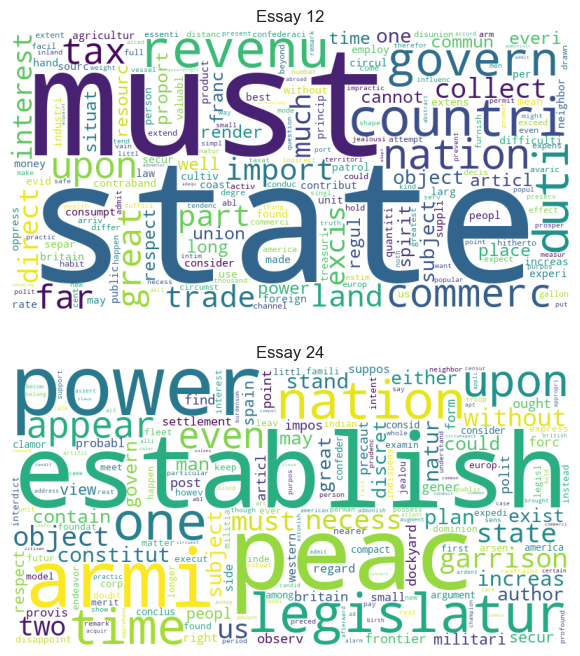

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

essay_12 = dtm_mat.iloc[11,:]
essay_24 = dtm_mat.iloc[23,:]

# Essay 12 word cloud
wordcloud_12 = WordCloud(
    width=800, height=400, background_color ='white'
).generate_from_frequencies(essay_12)

# Essay 24 word cloud
wordcloud_24 = WordCloud(
    width=800, height=400, background_color ='white'
).generate_from_frequencies(essay_24)

# plot word clouds vertically
fig, axs = plt.subplots(2, 1, figsize=(8,8))

axs[0].imshow(wordcloud_12)
axs[0].axis('off')
axs[0].set_title('Essay 12')

axs[1].imshow(wordcloud_24)
axs[1].axis('off')
axs[1].set_title('Essay 24')

In [50]:
# Import the tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a tf-idf dtm following the same steps as before 
tfidf_vect = TfidfVectorizer(analyzer=preprocess_text)

dtm_tfidf = tfidf_vect.fit_transform(federalist['text'])

dtm_tfidf_mat = pd.DataFrame(dtm_tfidf.toarray(), 
                             columns=tfidf_vect.get_feature_names_out())

# 10 most important words for Paper No. 12
dtm_tfidf_mat.iloc[11,:].sort_values(ascending=False).head(10)

revenu        0.214827
state         0.186738
excis         0.155990
must          0.149053
commerc       0.148469
trade         0.143082
tax           0.141690
countri       0.134673
contraband    0.127014
patrol        0.127014
Name: 11, dtype: float64

In [51]:
# 10 most important words for Paper No. 24
dtm_tfidf_mat.iloc[23,:].sort_values(ascending=False).head(10)

garrison      0.238167
armi          0.169594
peac          0.155266
dockyard      0.141620
settlement    0.141620
spain         0.141201
frontier      0.119084
establish     0.113686
western       0.109730
post          0.105901
Name: 23, dtype: float64

In [52]:
from sklearn.cluster import KMeans

'''
subset The Federalist papers written by Hamilton using the author column of 
the federalist DataFrame
'''
dtm_tfidf_hamilton = dtm_tfidf_mat[federalist['author']=='Hamilton']

k = 4 # number of clusters
# instantiate the KMeans object; set random_state for reproducibility
km_out = KMeans(n_clusters=k, n_init=1, random_state=1234) 
# fit the model
km_out.fit(dtm_tfidf_hamilton) 

# check convergence; number of iterations may vary
km_out.n_iter_

2

In [53]:
# create data frame from the cluster centers
centers = pd.DataFrame(km_out.cluster_centers_, 
                       columns=dtm_tfidf_hamilton.columns)

# extract Hamilton's papers from the federalist DataFrame
hamilton_df = (federalist.loc[federalist['author']=='Hamilton']
               .copy().reset_index(drop=True))

km_out.labels_ # cluster labels

array([3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 3, 1, 3, 1, 3, 3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 3, 3])

In [54]:
# add the cluster labels + 1 to the Hamilton DataFrame
hamilton_df['cluster'] = km_out.labels_ + 1

hamilton_df.head()

,fed_num,author,text,text_processed,cluster
0,1,Hamilton,AFTER an unequivocal experience of the ineffic...,"[unequivoc, experi, ineffici, subsist, feder, ...",4
1,6,Hamilton,THE three last numbers of this paper have been...,"[three, last, number, paper, dedic, enumer, da...",2
2,7,Hamilton,"IT IS sometimes asked, with an air of seeming ...","[sometim, ask, air, seem, triumph, induc, coul...",4
3,8,Hamilton,ASSUMING it therefore as an established truth ...,"[assum, therefor, establish, truth, sever, sta...",2
4,9,Hamilton,A FIRM Union will be of the utmost moment to t...,"[firm, union, utmost, moment, peac, liberti, s...",4


In [55]:
# store cluster numbers
clusters = np.arange(1, k+1)

In [56]:
# loop through the clusters and print the 10 most important words
for i in range(len(clusters)):
    print(f'CLUSTER {clusters[i]}')
    print('Top 10 words:')
    print(centers.iloc[i].sort_values(ascending=False).head(10))
    # store the essay numbers associated with each cluster
    essays = hamilton_df.loc[hamilton_df['cluster']==clusters[i], 'fed_num']
    print(f'Federalist Papers: {list(essays)}')
    print('\n')

CLUSTER 1
Top 10 words:
court        0.364607
state        0.178027
juri         0.159888
jurisdict    0.115161
law          0.109597
constitut    0.106743
case         0.100013
may          0.096671
trial        0.092269
tribun       0.086959
Name: 0, dtype: float64
Federalist Papers: [65, 78, 80, 81, 82, 83]


CLUSTER 2
Top 10 words:
state     0.186586
nation    0.110258
power     0.108624
govern    0.108323
revenu    0.096897
upon      0.092661
tax       0.081861
taxat     0.081696
war       0.079932
union     0.075792
Name: 1, dtype: float64
Federalist Papers: [6, 8, 12, 13, 30, 31, 32, 34, 36]


CLUSTER 3
Top 10 words:
senat      0.137996
presid     0.128147
execut     0.114111
offic      0.103012
power      0.100565
appoint    0.094708
upon       0.086095
state      0.082605
might      0.079387
may        0.078676
Name: 2, dtype: float64
Federalist Papers: [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79]


CLUSTER 4
Top 10 words:
state        0.173878
govern       0.125864
po

A few themes that emerge:

- Cluster 1: courts, law, jurisprudence
- Cluster 2: state power, tax, revenue
- Cluster 3: institutional design, executive, legislature
- Cluster 4: state power, national government

### Section 5.1.4: Authorship Prediction {-}

In [57]:
import statsmodels.formula.api as smf

'''
Customize the preprocessing function to make stemming and stopword removal
optional and to optionally return strings instead of lists of tokens.
'''
def preprocess_text(text, remove_stopwords=True, stem=True,
                    return_string=False):
    # make lower case
    text = text.lower()
    # remove punctuation
    text = "".join([word for word in text if word not in string.punctuation])
    # remove numbers 
    text = re.sub('[0-9]+', '', text)
    # create a list of individual tokens, removing whitespace
    tokens = re.split('\W+', text)
    # remove stopwords if remove_stopwords=True
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stopwords]
    # remove any empty strings associated with trailing spaces
    tokens = [word for word in tokens if word !='']
    # stem each word if stem=True
    if stem:
        tokens = [ps.stem(word) for word in tokens]
    if return_string:
        return ' '.join(tokens)
    else:
        return tokens

# If we preprocess before using the CountVectorizer, it expects strings
federalist['text_processed_v2'] = (
    federalist['text'].apply(lambda x: preprocess_text(
        x, stem=False, remove_stopwords=False, return_string=True))
)

federalist['text_processed_v2'].head()

0    after an unequivocal experience of the ineffic...
1    when the people of america reflect that they a...
2    it is not a new observation that the people of...
3    my last paper assigned several reasons why the...
4    queen anne in her letter of the st july to the...
Name: text_processed_v2, dtype: object

In [58]:
# this time, do not pass the preprocess_text function to the analyzer argument
count_vect1 = CountVectorizer()

dtm1 = count_vect1.fit_transform(federalist['text_processed_v2'])

dtm1_mat = pd.DataFrame(dtm1.toarray(), 
                        columns=count_vect1.get_feature_names_out())

# term frequency per 1000 words
row_sums = dtm1_mat.sum(axis='columns')
tfm = dtm1_mat.div(row_sums, axis='rows')*1000

# words of interest
words = ['although', 'always', 'commonly', 'consequently', 'considerable',
         'enough', 'there', 'upon', 'while', 'whilst']

# select only these words
tfm = tfm.loc[:, words]

# average among Hamilton/Madison essays
tfm_ave = (pd.concat(
    [tfm.loc[federalist['author']=='Hamilton'].sum(axis='rows') / len(hamilton),
     tfm.loc[federalist['author']=='Madison'].sum(axis='rows') / len(madison)],
     axis=1
)).T # transpose 

tfm_ave

,although,always,commonly,consequently,considerable,enough,there,upon,while,whilst
0,0.013654,0.577750,0.203337,0.019854,0.417913,0.303319,3.395702,3.380919,0.282721,0.005320
1,0.212740,0.158571,0.000000,0.353982,0.126829,0.000000,0.876109,0.156989,0.000000,0.300338


In [59]:
# add tfm to the federalist data frame
federalist = pd.concat([federalist, tfm], axis=1)

model_words = ['upon', 'there', 'consequently', 'whilst']

select_vars = ['fed_num', 'author'] + model_words

hm_data = (
    federalist.loc[federalist['author'].isin(['Hamilton', 'Madison']),
                   select_vars]
).copy().reset_index(drop=True)

hm_data['author_y'] = np.where(hm_data['author'] == "Hamilton", 1, -1)

hm_data.head()

,fed_num,author,upon,there,consequently,whilst,author_y
0,1,Hamilton,3.886010,1.295337,0.0,0.0,1
1,6,Hamilton,2.119767,4.239534,0.0,0.0,1
2,7,Hamilton,4.993191,4.085338,0.0,0.0,1
3,8,Hamilton,1.547189,1.031460,0.0,0.0,1
4,9,Hamilton,2.082249,1.561687,0.0,0.0,1


In [60]:
hm_model = 'author_y ~ upon + there + consequently + whilst'

hm_fit = smf.ols(hm_model, data=hm_data).fit()

hm_fit.params

Intercept      -0.271853
upon            0.218922
there           0.124089
consequently   -0.556267
whilst         -0.821720
dtype: float64

In [61]:
hm_fitted = hm_fit.fittedvalues

np.std(hm_fitted)

0.7128452675676532

### Section 5.1.5: Cross-Validation {-}

In [62]:
# proportion of correctly classified essays for Hamilton
(hm_fitted[hm_data['author_y']==1] > 0).mean()

1.0

In [63]:
# proportion of correctly classified essays for Madison
(hm_fitted[hm_data['author_y']==-1] < 0).mean()

1.0

In [64]:
n = len(hm_data)

# a container vector
hm_classify = np.zeros(n)

for i in range(n):
    # fit the model to the data after removing the ith observation
    sub_fit = smf.ols(hm_model, data=hm_data.drop(i)).fit()
    # predict the authorship for the ith observation
    # [[]] ensures the row remains a data frame
    # finally, extract value from prediction Series without index
    hm_classify[i] = sub_fit.predict(hm_data.iloc[[i]]).iloc[0]

# proportion of correctly classified essays for Hamilton
(hm_classify[hm_data['author_y']==1] > 0).mean()

1.0

In [65]:
# proportion of correctly classified essays for Madison
(hm_classify[hm_data['author_y']==-1] < 0).mean()

1.0

In [66]:
# subset essays with disputed authorship
disputed = federalist.loc[federalist['author']=='Disputed', select_vars]

# predict the authorship of the disputed essays
pred = hm_fit.predict(disputed)
pred

48   -0.974471
49   -0.069148
50   -1.484745
51   -0.271853
52   -0.543932
53   -0.553347
54    0.041819
55   -0.569111
56   -1.182493
61   -0.997734
62   -0.214164
dtype: float64

In [67]:
# prepare the data for plotting
hm_data['pred'] = hm_fitted
disputed['pred'] = pred

plot_vars = ['fed_num', 'author', 'pred']

plot_data = pd.concat([hm_data[plot_vars], disputed[plot_vars]], 
                      axis=0, ignore_index=True)

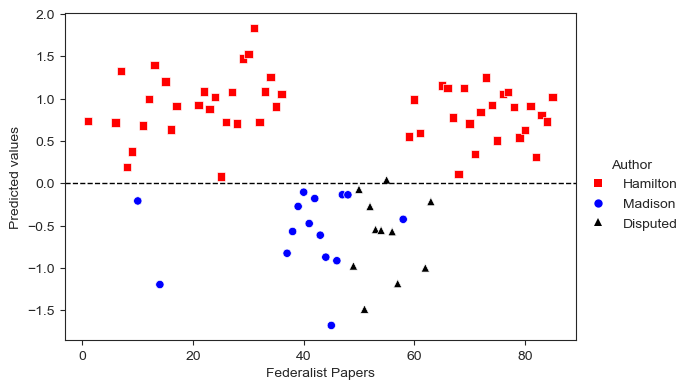

In [68]:
import seaborn as sns

sns.set_style('ticks')

(sns.relplot(
    data=plot_data, x='fed_num', y='pred', hue='author', style='author', 
    palette=['red', 'blue', 'black'], markers = ['s', 'o', '^'],
    height=4, aspect=1.5
).set(xlabel='Federalist Papers', ylabel='Predicted values')
.despine(right=False, top=False)._legend.set_title('Author'))

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

## Section 5.2: Network Data {-}

### Section 5.2.1: Marriage Network in Renaissance Florence {-}

**In Progress**